Importación de NLTK

In [ ]:
import nltk
nltk.download('cess_esp') #Se trae textos que ya tiene nltk adentro
import re

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [ ]:
corpus = nltk.corpus.cess_esp.sents()
print(corpus)
print(len(corpus))

[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]
6030


In [ ]:
flatten = [w for l in corpus for w in l]
print(len(flatten))
print(flatten[:20])

192686
['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana']


Implementación de búsqueda de palabras con expresiones regulares


In [ ]:
arr = [w for w in flatten if re.search('es', w)]

In [ ]:
print(arr[:5])

['estatal', 'jueves', 'empresa', 'centrales', 'francesa']


Con más expresiones regulares

In [ ]:
arr = [w for w in flatten if re.search('es$', w)] #El "es" tiene que estar ahora al final
print(arr[:5])
#arr = [w for w in flatten if re.search('^es', w)] #El "es" tiene que estar ahora al principio

['jueves', 'centrales', 'millones', 'millones', 'dólares']


In [ ]:
# Rango [ghi]
arr = [w for w in flatten if re.search('^[ghi]', w)] #Se busca todas las palabras que empiecen por g, h, i.
print(arr[:10])

['grupo', 'hoy', 'gas', 'gas', 'intervendrá', 'invertir', 'gas', 'hoy', 'insulto', 'intervención']


In [ ]:
arr = [w for w in flatten if re.search('[a-i]', w)] #todas las palabras de la a hasta i
print(arr[:10])

['grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'anunció', 'hoy', 'jueves', 'la', 'compra', 'del']


Clausuras


In [ ]:
# * repetir 0 o más veces
# + repetir 1 o más veces

In [ ]:
arr = [w for w in flatten if re.search('^(no)+', w)]
print(arr[:20])

['norte', 'no', 'no', 'noche', 'no', 'no', 'notificación', 'no', 'no', 'no', 'no_obstante', 'no', 'no', 'no', 'norte', 'no', 'no', 'no', 'no', 'norteamericano']


In [ ]:
arr = [w for w in flatten if re.search('^(no)*', w)]
print(arr[:20])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana']


## Normalización de texto

In [ ]:
texto = """ Cuando sea el rey del mundo  (imaginaba él en su cabeza) no tendré que  preocuparme por estas bobadas.
            Era solo un niño de 7 años, pero pensaba que podría ser cualquier cosa que su imaginación le permitiera visualizar en su cabeza ..."""
print(texto)

In [ ]:
# Caso 1: tokenizacion más simple: por espacios vacios
print(re.split(r' ', texto))

In [ ]:
# Caso 2: tokenización usando expresiones regulares
print(re.split(r'[ \t\n]+', texto))

In [ ]:
# RegEx reference: \W -> all characters other than letters, digits or underscore - Este es caso 2 pero con esteroides
print(re.split(r'[ \W\t\n]+', texto))

## Tokenizador de NLTK

In [ ]:
#Si pusieramos el regex anterior, no se tokenizaría bien por caracteres como "." o "..." o "$":
texto = 'En los E.U. esa postal vale $15.50 ...'
print(re.split(r'[ \W\t\n]+', texto))

['En', 'los', 'E', 'U', 'esa', 'postal', 'vale', '15', '50', '']


Para esos casos, podemos utilizar el tokenizador que trae NLTK, en donde podemos ajustar una expresión regular muy sofisticada a un texto de la siguiente forma:

In [ ]:
pattern = r'''(?x)                 # set flag to allow verbose regexps
              (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A.
              | \w+(?:-\w+)*       # words with optional internal hyphens
              | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
              | \.\.\.             # ellipsis
              | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
'''
nltk.regexp_tokenize(texto, pattern)

['En', 'los', 'E.U.', 'esa', 'postal', 'vale', '$15.50', '...']

## Estadistica del Lenguaje

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
# escogemos text1 que es el famoso libro Moby Dick
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text1):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic

## Método FreqDist de NLTK

In [ ]:
# NLTK tiene un metodo muy eficiente
fdist = FreqDist(text1)

In [ ]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

Distribución de frecuencia de aparición de palabras en el texto de moby dick

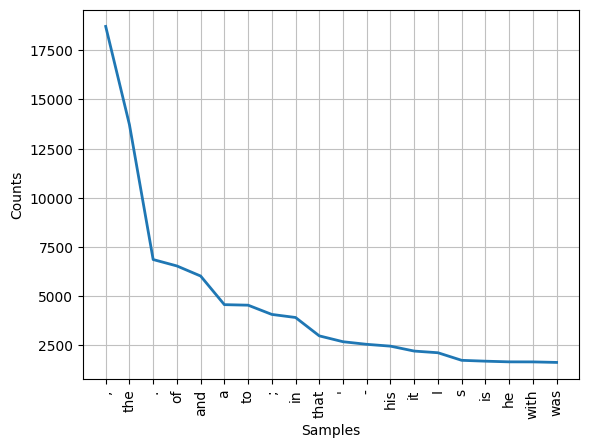

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(20)

In [ ]:
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino

* los tokens más frecuentes en un texto no son necesariamente las palabras que más información nos arrojan sobre el contenido del mismo

* Por ello, es mejor filtrar y contruir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [ ]:
from nltk.corpus import stopwords

long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

In [ ]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frecuencia', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_interesantes

array([(b'steady',  25), (b'hunted',  19), (b'chains',  18),
       (b'inside',  18), (b'singing',  11), (b'peculiar',  56),
       (b'hammer',  30), (b'fearful',  12), (b'account',  32),
       (b'through', 227), (b'behind',  50), (b'mother',  17),
       (b'darkness',  31), (b'affair',  17), (b'Fleece',  11),
       (b'spouts',  16), (b'events',  15), (b'ambergris',  12),
       (b'places',  20), (b'prairie',  11), (b'follow',  18),
       (b'forecastle',  34), (b'butter',  11), (b'swiftly',  19),
       (b'Nantuckete',  22), (b'devils',  16), (b'certain',  87),
       (b'hearts',  29), (b'flames',  15), (b'several',  46),
       (b'shadows',  15), (b'figure',  19), (b'strangely',  29),
       (b'strength',  23), (b'higher',  23), (b'closely',  14),
       (b'taking',  50), (b'circle',  24), (b'working',  15),
       (b'desperate',  12), (b'between', 117), (b'features',  11),
       (b'gunwale',  21), (b'spiritual',  11), (b'American',  34),
       (b'greater',  13), (b'descried',  2

In [ ]:
palabras_interesantes = np.sort(palabras_interesantes, order='frecuencia')
palabras_interesantes

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

## VISUALIZACIÓN SOBRE EL OBJETO NUMPY CREADO

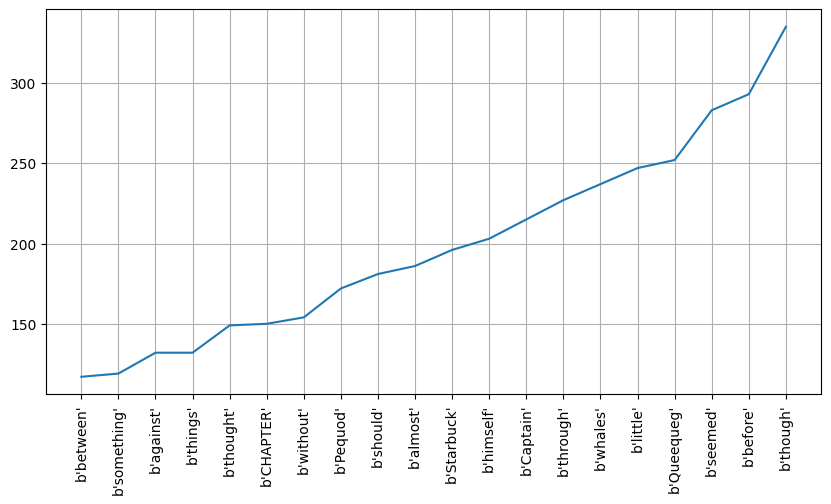

In [ ]:
top_words = 20
x= np.arange(len(palabras_interesantes[-top_words:]))
y= [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation= 'vertical')
plt.grid(True)
plt.show()